In [2]:
import xml.etree.ElementTree as ET
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

# create element tree object
tree = ET.parse('apple_health_export/export.xml') 
# for every health record, extract the attributes
root = tree.getroot()
record_list = [x.attrib for x in root.iter('Record')]

In [3]:
len(record_list)

1895908

## Create Pandas Df

In [4]:
record_data = pd.DataFrame(record_list)

# proper type to dates
for col in ['creationDate', 'startDate', 'endDate']:
    record_data[col] = pd.to_datetime(record_data[col])

# value is numeric, NaN if fails
record_data['value'] = pd.to_numeric(record_data['value'], errors='coerce')

# some records do not measure anything, just count occurences
# filling with 1.0 (= one time) makes it easier to aggregate
record_data['value'] = record_data['value'].fillna(1.0)

# shorter observation names
record_data['type'] = record_data['type'].str.replace('HKQuantityTypeIdentifier', '')
record_data['type'] = record_data['type'].str.replace('HKCategoryTypeIdentifier', '')
record_data.tail()

,type,sourceName,sourceVersion,unit,creationDate,startDate,endDate,value,device
1895903,HeartRateVariabilitySDNN,Vaibhav’s Apple Watch,8.7,ms,2023-07-01 15:01:50+05:30,2023-07-01 15:00:38+05:30,2023-07-01 15:00:48+05:30,9.93738,"<<HKDevice: 0x2822845a0>, name:Apple Watch, ma..."
1895904,HeartRateVariabilitySDNN,Vaibhav’s Apple Watch,8.7,ms,2023-07-01 19:49:06+05:30,2023-07-01 19:47:52+05:30,2023-07-01 19:48:52+05:30,36.00280,"<<HKDevice: 0x2822845a0>, name:Apple Watch, ma..."
1895905,HeartRateVariabilitySDNN,Vaibhav’s Apple Watch,8.7,ms,2023-07-02 07:49:53+05:30,2023-07-02 07:48:39+05:30,2023-07-02 07:49:31+05:30,66.03070,"<<HKDevice: 0x2822845a0>, name:Apple Watch, ma..."
1895906,HeartRateVariabilitySDNN,Vaibhav’s Apple Watch,8.7,ms,2023-07-02 15:12:43+05:30,2023-07-02 15:11:30+05:30,2023-07-02 15:12:29+05:30,32.44280,"<<HKDevice: 0x2822845a0>, name:Apple Watch, ma..."
1895907,HeartRateVariabilitySDNN,Vaibhav’s Apple Watch,8.7,ms,2023-07-02 18:57:24+05:30,2023-07-02 18:56:09+05:30,2023-07-02 18:57:09+05:30,37.78920,"<<HKDevice: 0x2822845a0>, name:Apple Watch, ma..."


### Extract Workouts

In [7]:
workout_list = [x.attrib for x in root.iter('Workout')]

# create DataFrame
workout_data = pd.DataFrame(workout_list)
workout_data['workoutActivityType'] = workout_data['workoutActivityType'].str.replace('HKWorkoutActivityType', '')
workout_data = workout_data.rename({"workoutActivityType": "Type"}, axis=1)

# proper type to dates
for col in ['creationDate', 'startDate', 'endDate']:
    workout_data[col] = pd.to_datetime(workout_data[col])

# convert string to numeric   
workout_data['duration'] = pd.to_numeric(workout_data['duration'])
workout_data['totalEnergyBurned'] = pd.to_numeric(workout_data.get('totalEnergyBurned'))
workout_data['totalDistance'] = pd.to_numeric(workout_data.get('totalDistance'))
workout_data.tail()

,Type,duration,durationUnit,sourceName,sourceVersion,creationDate,startDate,endDate,device,totalEnergyBurned,totalDistance
1192,Swimming,22.233333,min,Withings,6000100,2023-10-24 06:19:55+05:30,2023-10-22 18:12:17+05:30,2023-10-22 18:34:31+05:30,"<<HKDevice: 0x28223e210>, name:Steel HR, manuf...",NaN,NaN
1193,Swimming,17.350000,min,Withings,6000100,2023-10-25 08:12:23+05:30,2023-10-24 18:44:44+05:30,2023-10-24 19:02:05+05:30,"<<HKDevice: 0x28223e210>, name:Steel HR, manuf...",NaN,NaN
1194,Tennis,68.000000,min,Withings,6010004,2023-10-26 09:32:38+05:30,2023-10-26 06:26:00+05:30,2023-10-26 07:34:00+05:30,"<<HKDevice: 0x28223e210>, name:Steel HR, manuf...",NaN,NaN
1195,Swimming,19.483333,min,Withings,6010004,2023-10-27 07:23:36+05:30,2023-10-26 18:48:54+05:30,2023-10-26 19:08:23+05:30,"<<HKDevice: 0x28223e210>, name:Steel HR, manuf...",NaN,NaN
1196,Tennis,45.000000,min,Withings,6010004,2023-10-27 08:07:26+05:30,2023-10-27 06:22:00+05:30,2023-10-27 07:07:00+05:30,"<<HKDevice: 0x28223e210>, name:Steel HR, manuf...",NaN,NaN


### Workouts by Type

In [8]:
def get_workouts(df, workout_type):
    return df[df["Type"] == workout_type]

# to see the different workout types use:
print(workout_data.Type.unique())

['Cycling' 'Running' 'Swimming' 'Walking' 'Hiking' 'Rowing'
 'CrossTraining' 'Yoga' 'MixedMetabolicCardioTraining' 'SnowSports'
 'Other' 'PaddleSports' 'TraditionalStrengthTraining' 'Badminton' 'Squash'
 'CardioDance' 'Tennis']


In [10]:
baddy = get_workouts(workout_data, "Badminton")
tennis = get_workouts(workout_data, "Tennis")

In [14]:
baddy

,Type,duration,durationUnit,sourceName,sourceVersion,creationDate,startDate,endDate,device,totalEnergyBurned,totalDistance
1004,Badminton,62.016667,min,Withings,5160300,2023-09-21 16:11:39+05:30,2022-08-16 18:18:08+05:30,2022-08-16 19:20:09+05:30,"<<HKDevice: 0x28223e210>, name:Steel HR, manuf...",NaN,NaN
1007,Badminton,98.050000,min,Withings,5160300,2023-09-21 16:11:41+05:30,2022-08-18 17:58:18+05:30,2022-08-18 19:36:21+05:30,"<<HKDevice: 0x28223e210>, name:Steel HR, manuf...",NaN,NaN
1008,Badminton,99.000000,min,Withings,5160300,2023-09-21 16:11:40+05:30,2022-08-18 18:01:00+05:30,2022-08-18 19:40:00+05:30,"<<HKDevice: 0x28223e210>, name:Steel HR, manuf...",NaN,NaN
1014,Badminton,58.000000,min,Withings,5160300,2023-09-21 16:11:41+05:30,2022-08-22 18:13:00+05:30,2022-08-22 19:11:00+05:30,"<<HKDevice: 0x28223e210>, name:Steel HR, manuf...",NaN,NaN
1016,Badminton,67.000000,min,Withings,5160300,2023-09-21 16:11:40+05:30,2022-08-23 18:11:00+05:30,2022-08-23 19:18:00+05:30,"<<HKDevice: 0x28223e210>, name:Steel HR, manuf...",NaN,NaN
1019,Badminton,46.000000,min,Withings,5160300,2023-09-21 16:11:41+05:30,2022-08-25 18:53:00+05:30,2022-08-25 19:39:00+05:30,"<<HKDevice: 0x28223e210>, name:Steel HR, manuf...",NaN,NaN
1023,Badminton,47.000000,min,Withings,5160300,2023-09-21 16:11:38+05:30,2022-09-01 18:45:00+05:30,2022-09-01 19:32:00+05:30,"<<HKDevice: 0x28223e210>, name:Steel HR, manuf...",NaN,NaN
1027,Badminton,86.000000,min,Withings,5160300,2023-09-21 16:11:39+05:30,2022-09-06 18:13:00+05:30,2022-09-06 19:39:00+05:30,"<<HKDevice: 0x28223e210>, name:Steel HR, manuf...",NaN,NaN
1028,Badminton,90.000000,min,Withings,5160300,2023-09-21 16:11:44+05:30,2022-09-07 18:04:00+05:30,2022-09-07 19:34:00+05:30,"<<HKDevice: 0x28223e210>, name:Steel HR, manuf...",NaN,NaN
1030,Badminton,21.000000,min,Withings,5160300,2023-09-21 16:11:42+05:30,2022-09-14 18:35:00+05:30,2022-09-14 18:56:00+05:30,"<<HKDevice: 0x28223e210>, name:Steel HR, manuf...",NaN,NaN


In [12]:
tennis

,Type,duration,durationUnit,sourceName,sourceVersion,creationDate,startDate,endDate,device,totalEnergyBurned,totalDistance
1113,Tennis,17.0,min,Withings,5160300,2023-09-21 16:11:40+05:30,2023-04-25 06:31:00+05:30,2023-04-25 06:48:00+05:30,"<<HKDevice: 0x28223e210>, name:Steel HR, manuf...",NaN,NaN
1114,Tennis,52.0,min,Withings,5160300,2023-09-21 16:11:40+05:30,2023-04-28 06:14:00+05:30,2023-04-28 07:06:00+05:30,"<<HKDevice: 0x28223e210>, name:Steel HR, manuf...",NaN,NaN
1115,Tennis,34.0,min,Withings,5160300,2023-09-21 16:11:39+05:30,2023-04-28 19:07:00+05:30,2023-04-28 19:41:00+05:30,"<<HKDevice: 0x28223e210>, name:Steel HR, manuf...",NaN,NaN
1117,Tennis,33.0,min,Withings,5160300,2023-09-21 16:11:40+05:30,2023-05-23 06:14:00+05:30,2023-05-23 06:47:00+05:30,"<<HKDevice: 0x28223e210>, name:Steel HR, manuf...",NaN,NaN
1118,Tennis,24.0,min,Withings,5160300,2023-09-21 16:11:40+05:30,2023-05-24 06:18:00+05:30,2023-05-24 06:42:00+05:30,"<<HKDevice: 0x28223e210>, name:Steel HR, manuf...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1188,Tennis,37.0,min,Withings,6000100,2023-10-18 09:07:40+05:30,2023-10-18 06:45:00+05:30,2023-10-18 07:22:00+05:30,"<<HKDevice: 0x28223e210>, name:Steel HR, manuf...",NaN,NaN
1189,Tennis,64.0,min,Withings,6000100,2023-10-19 07:39:46+05:30,2023-10-19 06:34:00+05:30,2023-10-19 07:38:00+05:30,"<<HKDevice: 0x282236670>, name:Steel HR, manuf...",NaN,NaN
1191,Tennis,76.0,min,Withings,6000100,2023-10-22 09:11:04+05:30,2023-10-22 07:01:00+05:30,2023-10-22 08:17:00+05:30,"<<HKDevice: 0x28223e210>, name:Steel HR, manuf...",NaN,NaN
1194,Tennis,68.0,min,Withings,6010004,2023-10-26 09:32:38+05:30,2023-10-26 06:26:00+05:30,2023-10-26 07:34:00+05:30,"<<HKDevice: 0x28223e210>, name:Steel HR, manuf...",NaN,NaN


### Get Workouts In Time Period

In [29]:
def get_workouts_from_to(df, start, end):
    start = pd.to_datetime(start, utc=True)
    end = pd.to_datetime(end, utc=True)
    workouts = df[df["creationDate"] >= start]
    workouts = workouts[workouts["creationDate"] <= end]
    return workouts

lower_time = dt.date(2023, 1, 1)
upper_time = dt.date(2024, 1, 1)
workouts = get_workouts_from_to(workout_data, lower_time, upper_time)

In [17]:
# or relative to the current day
today = dt.date.today()
xdaysago = today - dt.timedelta(days=7)
# first_of_month = today - dt.timedelta(days=today.day - 1)
#workouts = get_workouts_from_to(workout_data, xdaysago, today)

### Extract Heart Rate

In [25]:
def get_heartrate_for_workout(heartrate, workout):
    def get_heartrate_for_date(hr, start, end):
        hr = hr[hr["startDate"] >= start]
        hr = hr[hr["endDate"] <= end]
        return hr
    return get_heartrate_for_date(heartrate, workout["startDate"].item(), workout["endDate"].item())

heartrate_data = record_data[record_data["type"] == "HeartRate"]

# Extract heartrate statistics for certain workout
last_workout = workouts.iloc[[-4]]
heartrate_workout = get_heartrate_for_workout(heartrate_data, last_workout)
minh = heartrate_workout["value"].min()
maxh = heartrate_workout["value"].max()
meanh = heartrate_workout["value"].mean()
print(last_workout.Type.item(), minh, maxh, meanh)

Swimming 63.0 130.0 105.64684014869889


<AxesSubplot:xlabel='endDate'>

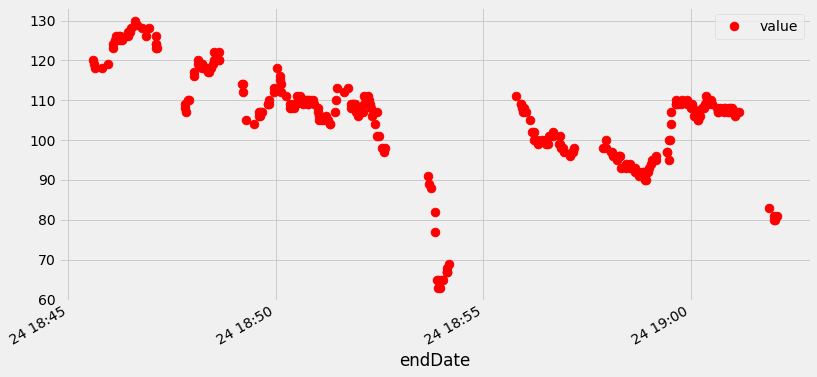

In [26]:
heartrate_workout.plot(x='endDate', y='value', style='ro', markersize=8.5,  figsize=(12, 6))

### Get Stats

In [32]:
def get_hr_for_workout_row(workout, heartrate):
    def get_hr_for_date(hr, start, end):
        hr = hr[hr["startDate"] >= start]
        hr = hr[hr["endDate"] <= end]
        return hr
    return get_hr_for_date(heartrate, workout["startDate"], workout["endDate"])

def convert_to_minute_proportion(number):
    return int(number) + ((number % 1) / 100 * 60)

def get_pace_for_workout(workout):
    if workout["totalDistance"] == 0.0:
        return 0.0
    # pace=min/km
    pace = workout["duration"] / workout["totalDistance"]
    return convert_to_minute_proportion(pace)

def get_stats(workouts):
    total_kcal = workouts["totalEnergyBurned"].sum()
    total_dist = workouts["totalDistance"].sum()
    total_time = workouts["duration"].sum()
    total_time_hours = convert_to_minute_proportion(total_time / 60)
    total_time_mins = convert_to_minute_proportion(total_time)

#    avg_kcal = workouts["totalEnergyBurned"].mean()
#    avg_dist = workouts[workouts["Type"] == "Running"]["totalDistance"].mean()
#    avg_pace = workouts[workouts["Type"] == "Running"]["pace"].mean()
    avg_time = workouts["duration"].mean()
    avg_time_hours = convert_to_minute_proportion(avg_time / 60)
    avg_time_mins = convert_to_minute_proportion(avg_time)

    print(f"Workout statistics from {lower_time} to {upper_time-dt.timedelta(days=1)}")
    print(f"{workouts.shape[0]} workouts")
 #   print(f"Time: {total_time_mins:.2f} minutes ({total_time_hours:.2f} hours)\nCalories burned: {total_kcal:.2f}kcal\nRunning distance: {total_dist:.2f}km")
    print("\nAverage per workout:")
 #   print(f"Time: {avg_time_mins:.2f} minutes ({avg_time_hours:.2f} hours)\nCalories burned: {avg_kcal:.2f}kcal\nRunning distance: {avg_dist:.2f}km\nRunning pace: {avg_pace:.2f}km/h")
    print(f"Time: {avg_time_mins:.2f} minutes ({avg_time_hours:.2f} hours)")

get_stats(workouts)

Workout statistics from 2023-01-01 to 2023-12-31
211 workouts

Average per workout:
Time: 52.27 minutes (0.52 hours)


### Plot Workouts Pie Chart

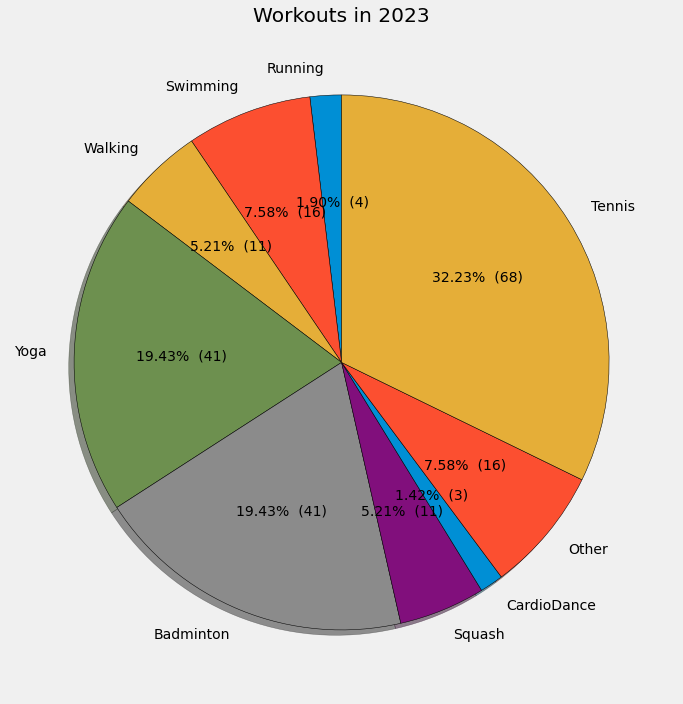

In [30]:
def plot_workouts(workouts):
    labels = []
    slices = []
    for wo_type in workouts.Type.unique():
        labels.append(wo_type)
        wo_of_type = workouts[workouts["Type"] == wo_type]
        num_workouts_of_type = wo_of_type.shape[0]
        slices.append(num_workouts_of_type)

    def make_autopct(values):
        def my_autopct(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
        return my_autopct

    plt.figure(figsize=(10, 10))
    plt.pie(slices, labels=labels, shadow=True,
            startangle=90, autopct=make_autopct(slices),
            wedgeprops={'edgecolor': 'black'})

    plt.title("Workouts in 2023")
    plt.tight_layout()
    plt.show()

plot_workouts(workouts)